## Import Library 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Algoritma DDA Garis

In [2]:
def round(a):
    return int(a + 0.5)

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
    color: black !important;
    width:20%;
}
</style>

In [4]:
def dda(x0,y0,x1,y1):
    x = []
    y = []
    deltaX = x1-x0
    deltaY = y1-y0
    if abs(deltaX) > abs(deltaY):
      step = abs(deltaX)
    else:
      step = abs(deltaY)
    x_inc = abs(deltaX) / step
    y_inc = abs(deltaY) / step
    for i in range(step):
        x0 = round(x0 + x_inc)
        y0 = round(y0 + y_inc)
        x.append(x0)
        y.append(y0)
    return x,y

In [5]:
x, y = dda(20,10,30,18)
dda(20,10,30,18)

([21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
 [11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [6]:
round_x = [round(x) for x in x]
round_y = [round(x) for x in y]

df = pd.DataFrame({'x': x, 'y':y})
rd = pd.DataFrame({'round(x)':round_x, 'round(y)':round_y})
df['round(x),round(y)']= "{"+rd["round(x)"].astype(str) +","+ rd["round(y)"].astype(str)+"}"
df

,x,y,"round(x),round(y)"
0,21,11,"{21,11}"
1,22,12,"{22,12}"
2,23,13,"{23,13}"
3,24,14,"{24,14}"
4,25,15,"{25,15}"
5,26,16,"{26,16}"
6,27,17,"{27,17}"
7,28,18,"{28,18}"
8,29,19,"{29,19}"
9,30,20,"{30,20}"


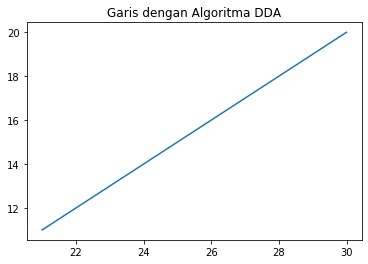

In [7]:
plt.plot(x, y)
plt.title('Garis dengan Algoritma DDA')
plt.show()

## Algoritma Bressenham Garis 

In [8]:
def bresenham(x0,y0,x1,y1):  
    xbresenham = []
    ybresenham = []
    pkarray = []
    deltaX = x1-x0
    deltaY = y1-y0
    delta2x = 2*deltaX
    delta2y = 2*deltaY
    delta2y2x = delta2y-delta2x
    p0 = delta2y-deltaX
    pk = p0
    for i in range(deltaX):
        if pk==p0 and pk>0:
            x0 = x0+1
            y0 = y0+1
            pk = pk+delta2y2x
            xbresenham.append(x0)
            ybresenham.append(y0)
            pkarray.append(pk)
        elif pk!=p0 and pk>0:
            x0 = x0+1
            y0 = y0+1
            pk = pk+delta2y2x
            xbresenham.append(x0)
            ybresenham.append(y0)
            pkarray.append(pk)
        elif pk!=p0 and pk<0:
            x0 = x0+1
            pk = pk+delta2y
            xbresenham.append(x0)
            ybresenham.append(y0)
            pkarray.append(pk)
        else:
            x0 = x0+1
            pk = pk+1+delta2y
            xbresenham.append(x0)
            ybresenham.append(y0)
            pkarray.append(pk)
    return xbresenham,ybresenham, pkarray

In [9]:
xbresenham, ybresenham, pkarray = bresenham(20,10,30,18)
bresenham(20,10,30,18)

([21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
 [11, 12, 12, 13, 14, 15, 16, 16, 17, 18],
 [2, -2, 14, 10, 6, 2, -2, 14, 10, 6])

## Menampilkan Tabel 

In [10]:
df = pd.DataFrame({'pk': pkarray,'x': xbresenham, 'y':ybresenham})
df['round(x),round(y)']= "{"+rd["round(x)"].astype(str) +","+ rd["round(y)"].astype(str)+"}"
df

,pk,x,y,"round(x),round(y)"
0,2,21,11,"{21,11}"
1,-2,22,12,"{22,12}"
2,14,23,12,"{23,13}"
3,10,24,13,"{24,14}"
4,6,25,14,"{25,15}"
5,2,26,15,"{26,16}"
6,-2,27,16,"{27,17}"
7,14,28,16,"{28,18}"
8,10,29,17,"{29,19}"
9,6,30,18,"{30,20}"


##  Menampilkan Grafik

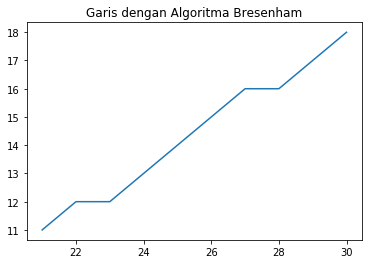

In [11]:
plt.plot(xbresenham, ybresenham)
plt.title('Garis dengan Algoritma Bresenham')
plt.show()

## Algoritma Bressenham Lingkaran

In [12]:
def lingkaran(x0,y0,r):
    X = []
    Y = []
    duaX = []
    duaY = []
    pks = []
    y0 = y0+r
    pk = 1-r
    pks.append(pk)
    while x0<y0:
        if pk < 0:
            x0 = x0+1
            duax = 2*x0
            duay = 2*y0
            pk = pk+duax+1
            X.append(x0)
            Y.append(y0)
            pks.append(pk)
            duaX.append(duax)
            duaY.append(duay)
        else:
            x0 = x0+1
            y0 = y0-1
            duax = 2*x0
            duay = 2*y0
            pk = pk+duax+1-duay
            pks.append(pk)
            X.append(x0)
            Y.append(y0)
            duaX.append(duax)
            duaY.append(duay)
        
    return X,Y,pks,duaX,duaY

In [13]:
X,Y,pks,duaX,duaY = lingkaran(0,50,100)
pks = pks[:-1]

In [14]:
df = pd.DataFrame({'pk':pks, 'x': X, 'y':Y, '2x': duaX, '2y': duaY})
df

,pk,x,y,2x,2y
0,-99,1,150,2,300
1,-96,2,150,4,300
2,-91,3,150,6,300
3,-84,4,150,8,300
4,-75,5,150,10,300
...,...,...,...,...,...
101,164,102,110,204,220
102,149,103,109,206,218
103,138,104,108,208,216
104,131,105,107,210,214


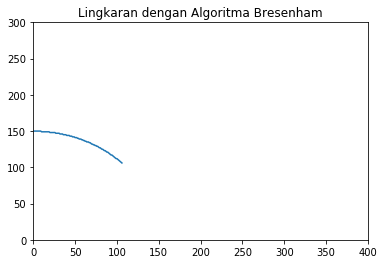

In [15]:
plt.plot(X,Y)
plt.title('Lingkaran dengan Algoritma Bresenham')
plt.axis([0, 400, 0, 300])
plt.show()

## Pencerminan 

### Diagonal 

In [16]:
def pencerminan1():
    k = len(df.index)-1
    while k >= 0: 
        X.append(Y[k])
        Y.append(X[k])
        k=k-1 

###  Vertical

In [17]:
def pencerminan2():
    k = len(df.index)-1
    while k >= 0: 
        X.append(X[k])
        Y.append(Y[k]*-1)
        k=k-1 

In [18]:
def pencerminan2():
    k = len(df.index)-1
    while k >= 0: 
        X.append(X[k])
        Y.append(Y[k]*-1)
        k=k-1 

In [19]:
pencerminan1()
df = pd.DataFrame({'x': X, 'y':Y})

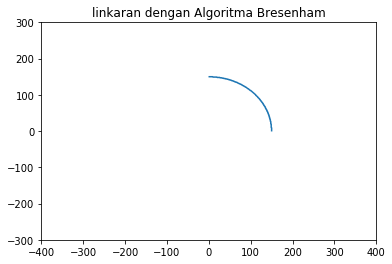

In [20]:
plt.plot(X,Y)
plt.title('linkaran dengan Algoritma Bresenham')
plt.axis([-400, 400, -300, 300])
plt.show()

In [21]:
pencerminan2()
df = pd.DataFrame({'x': X, 'y':Y})

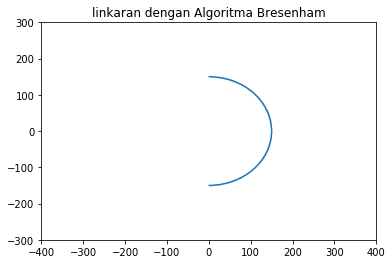

In [22]:
plt.plot(X,Y)
plt.title('linkaran dengan Algoritma Bresenham')
plt.axis([-400, 400, -300, 300])
plt.show()